In [1]:
%load_ext autoreload
%autoreload 2
import sympy as sp
from SymbolsHolder import make_derivative_symbol
from qbee import polynomialize, quadratic_linearize
from visuzalization.vizualization import visualize

sp.init_printing()

x, y, z = sp.symbols('x, y, z')
dot_x, dot_y, dot_z = list(map(make_derivative_symbol, [x, y, z]))


### Simple systems

In [2]:
system = [
    sp.Eq(dot_x, x**3)
]

system

In [3]:
quadratic_linearize(system)

In [4]:
system = \
    [
        sp.Eq(dot_x, x**3),
        sp.Eq(dot_y, x * z**2),
        sp.Eq(dot_z, z)
    ]

system

In [5]:
quadratic_linearize(system)

# Example 6.3.5 from [article](https://www2.eecs.berkeley.edu/Pubs/TechRpts/2012/EECS-2012-217.pdf)

There are several methods to quadratic-linearize a system. We propose 'sqrt-count-first'
as the most successful for now. 

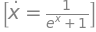

In [6]:
system = \
    [
        sp.Eq(dot_x, 1 / (1 + sp.exp(x)))
    ]

system

In [7]:
quadratic_linearize(system, mode='heuristic', debug='info', log_file='graph_log.csv')

----------------------------------------------------------------------------------------------------
Equations added: 3
Last replacement: Eq(y_{2}, -y_{1}**2)
----------------------------------------------------------------------------------------------------
Equations added: 4
Last replacement: Eq(y_{3}, y_{2}**2)
----------------------------------------------------------------------------------------------------
Equations added: 5
Last replacement: Eq(y_{4}, y_{0}*y_{2})
----------------------------------------------------------------------------------------------------
Equations added: 6
Last replacement: Eq(y_{5}, y_{0}**2)
----------------------------------------------------------------------------------------------------


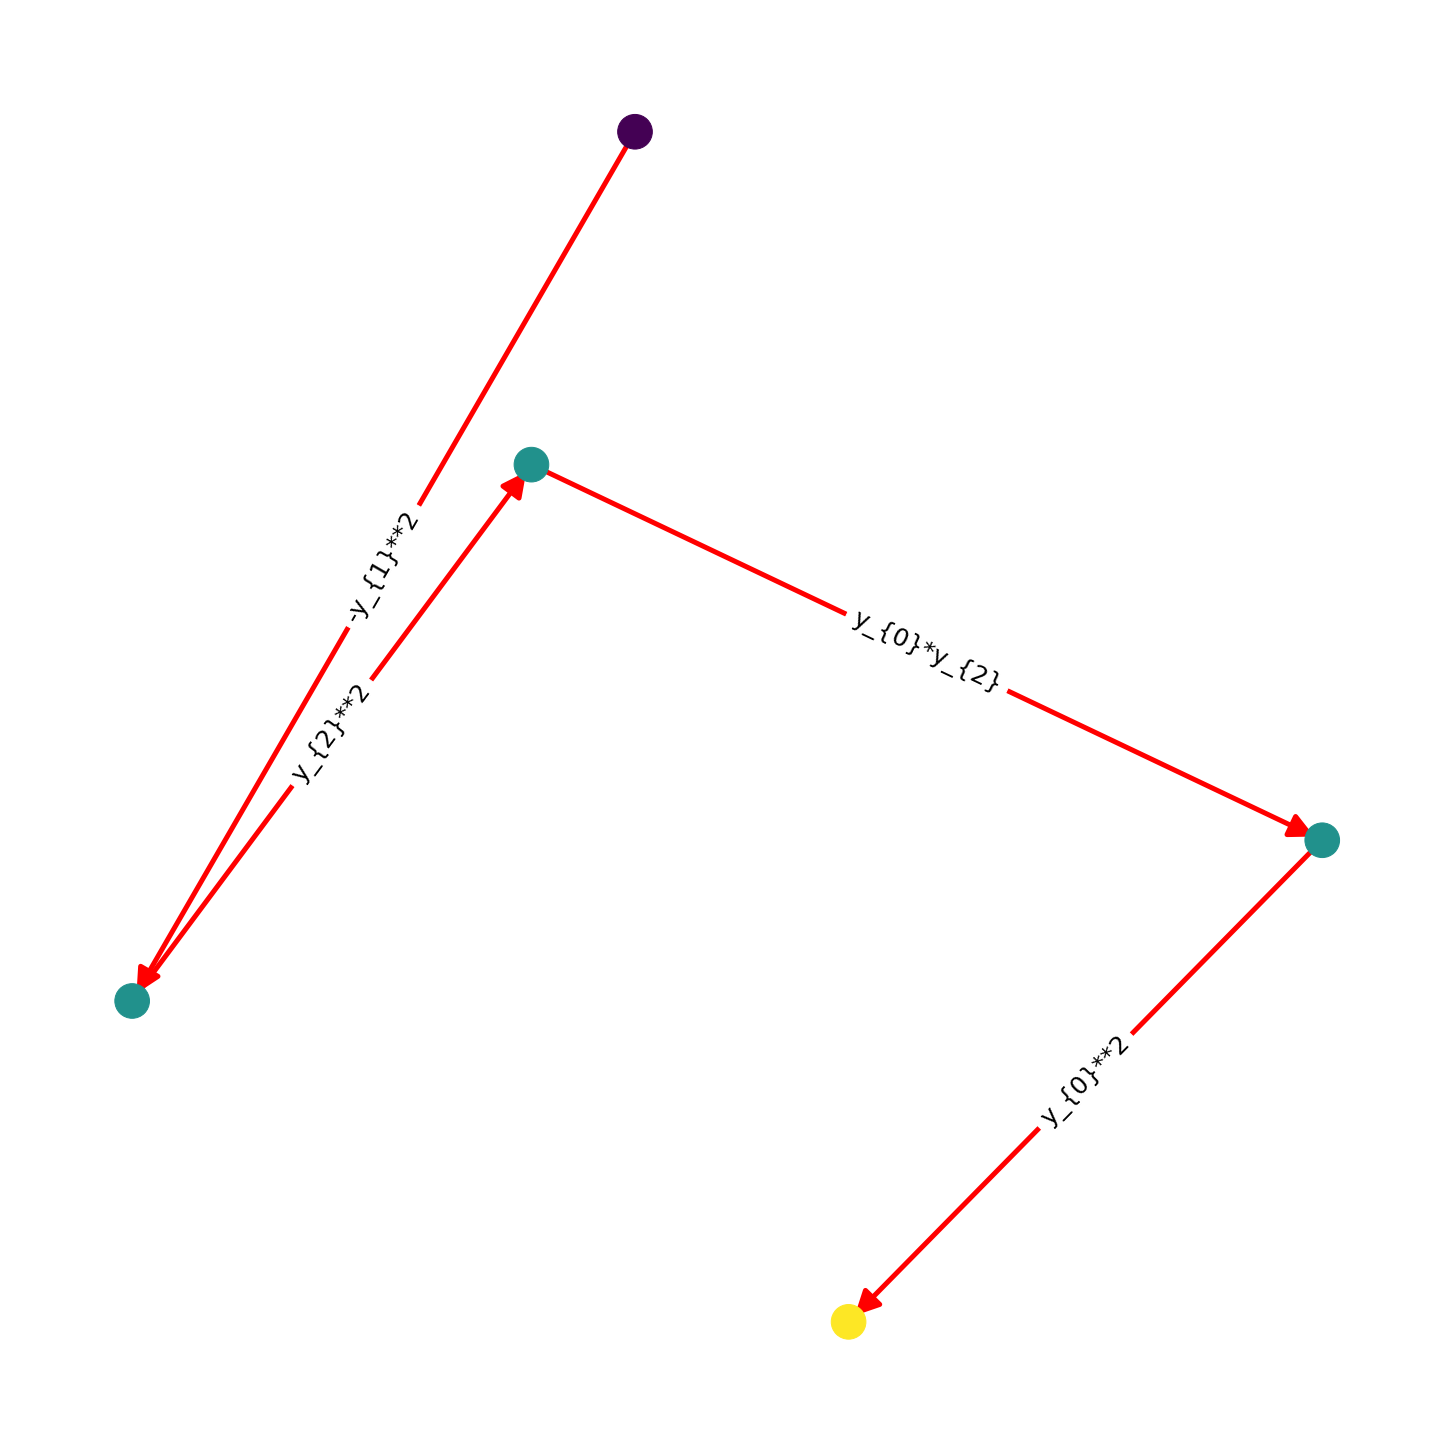

In [8]:
visualize('graph_log.csv', node_size=1200, edge_width=2, edge_label_font_size=25)

In [9]:
quadratic_linearize(system, mode='optimal', debug='info', log_file='graph_log.csv')

System nodes processed:  96%|██████████████████████████████▊ | 25/26 [00:00<00:00, 26.02node/s, Current depth level: 2]


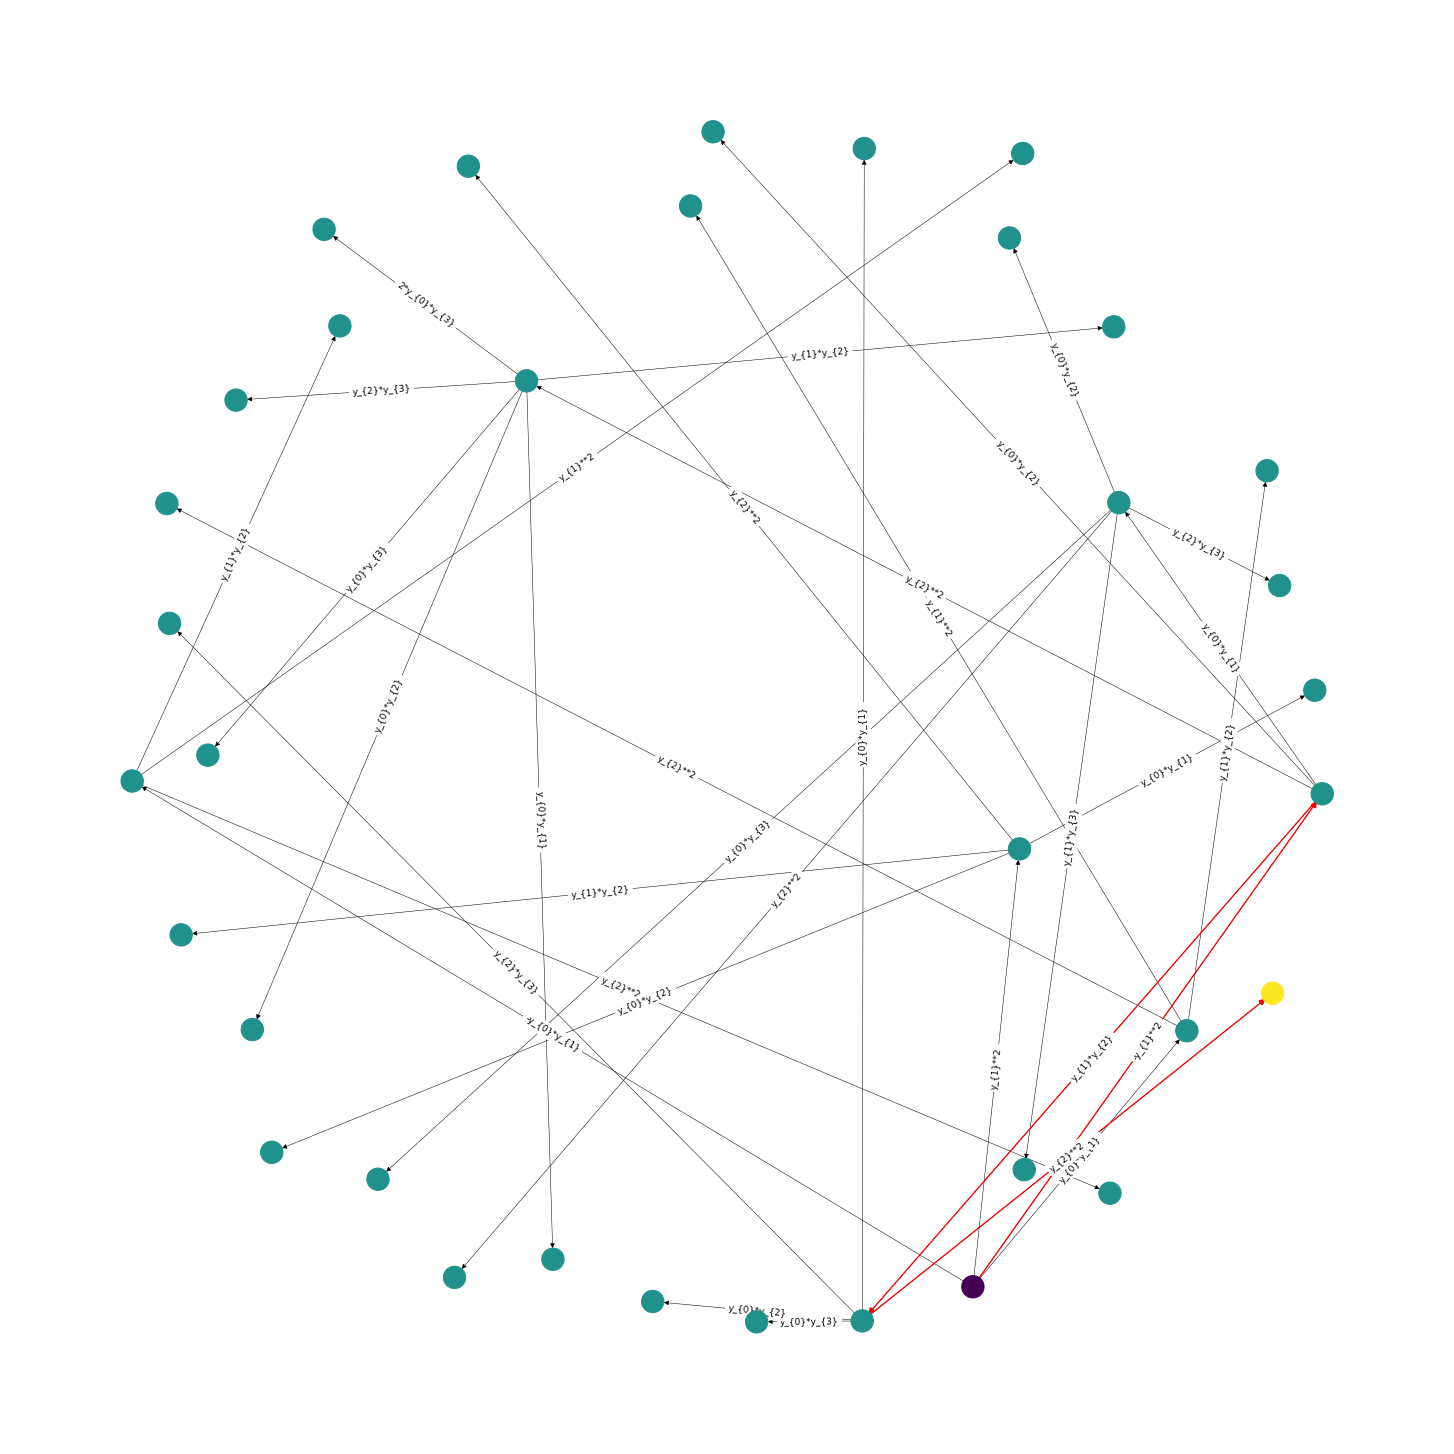

In [10]:
visualize('graph_log.csv', figsize=(20, 20), node_size=500, edge_width=0.5, edge_label_font_size=9)

# $x^2y^2z^2$ Example

In [11]:
x, y, z, w = sp.symbols('x, y, z, w')
x_dot = make_derivative_symbol(x)
y_dot = make_derivative_symbol(y)
z_dot = make_derivative_symbol(z)
w_dow = make_derivative_symbol(w)

system = [
    sp.Eq(x_dot, 0),
    sp.Eq(y_dot, 0),
    sp.Eq(z_dot, 0),
    sp.Eq(w_dow, x**2 * y**2 * z**2)
]

system

In [12]:
quadratic_linearize(system, mode='heuristic', debug='info', log_file='graph_log.csv')

----------------------------------------------------------------------------------------------------
Equations added: 1
Last replacement: Eq(y_{0}, z**2)
----------------------------------------------------------------------------------------------------
Equations added: 2
Last replacement: Eq(y_{1}, y**2)
----------------------------------------------------------------------------------------------------
Equations added: 3
Last replacement: Eq(y_{2}, x**2)
----------------------------------------------------------------------------------------------------
Equations added: 4
Last replacement: Eq(y_{3}, y_{0}*y_{1})
----------------------------------------------------------------------------------------------------


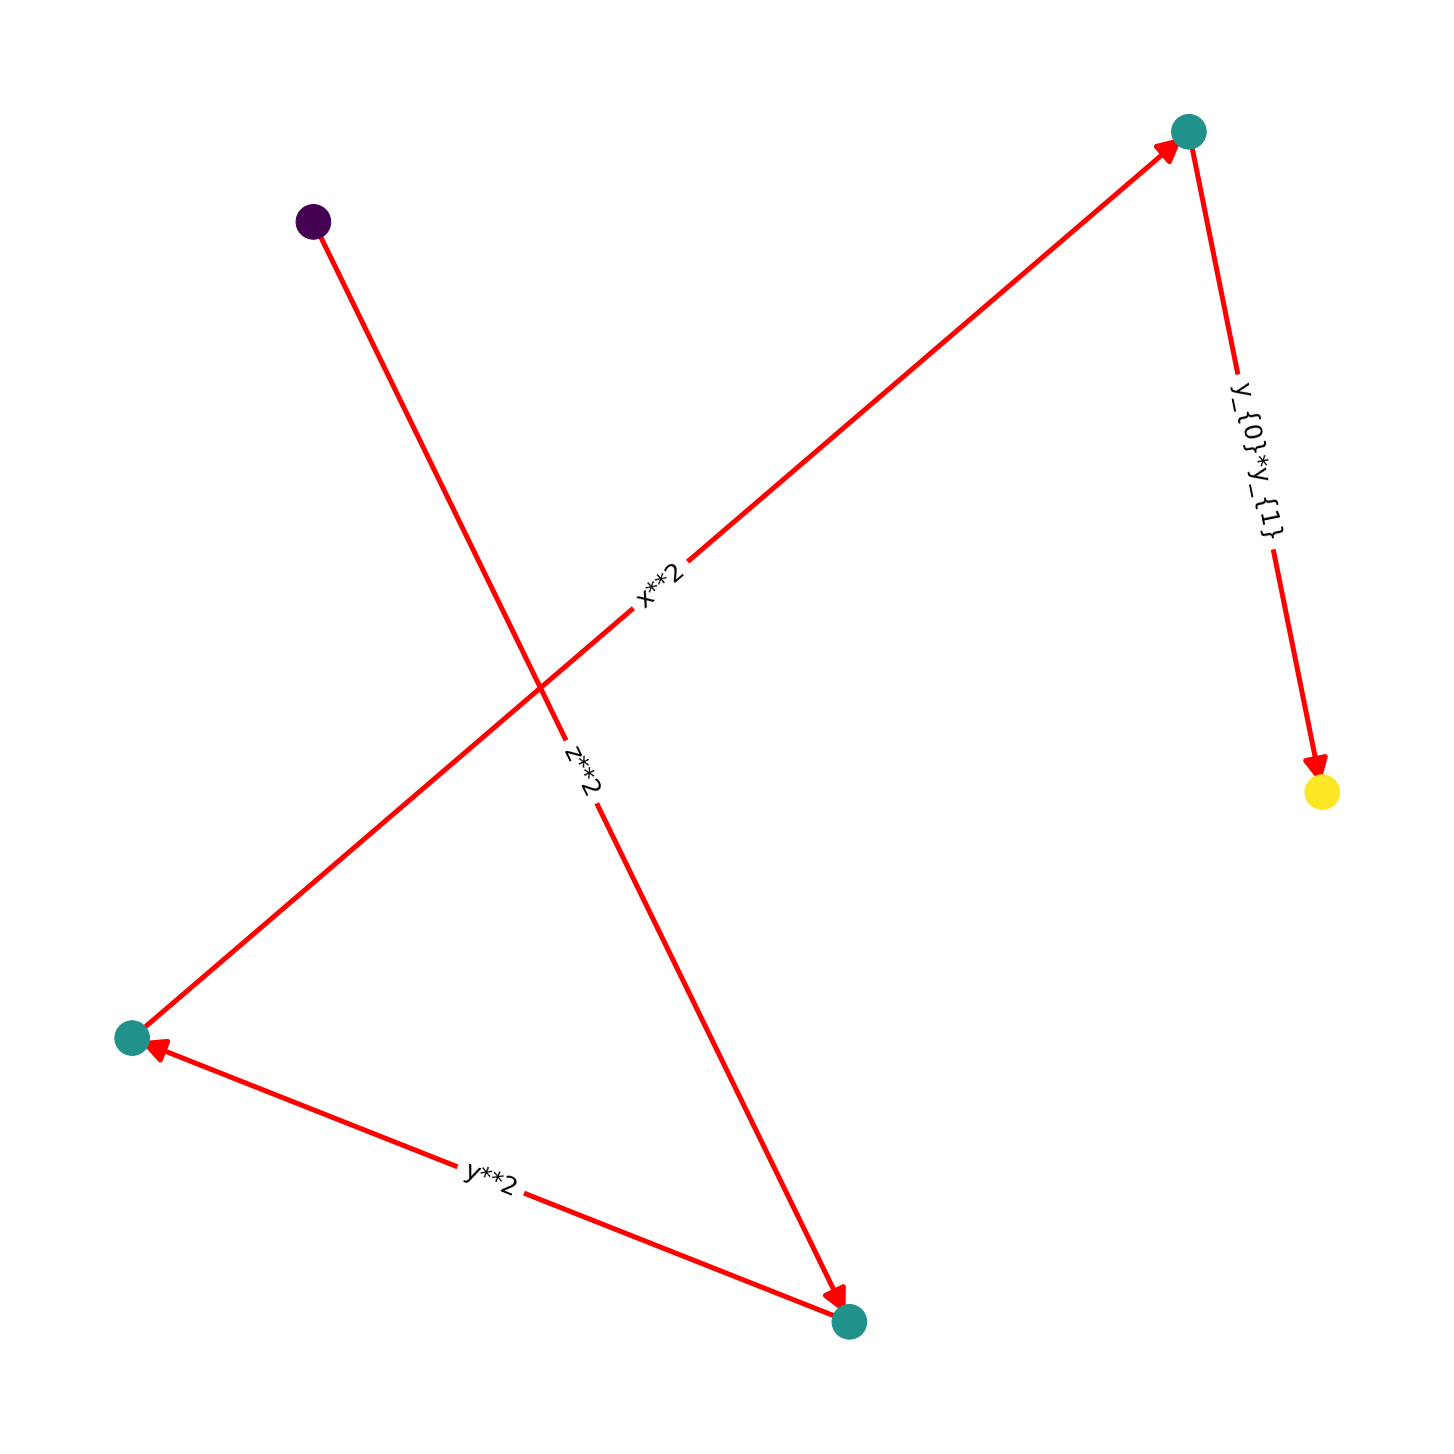

In [13]:
visualize('graph_log.csv', node_size=1200, edge_width=2, edge_label_font_size=25)

In [14]:
quadratic_linearize(system, mode='optimal', debug='info', log_file='graph_log.csv')

System nodes processed: 100%|█████████████████████████████▉| 499/500 [00:36<00:00, 13.57node/s, Current depth level: 4]


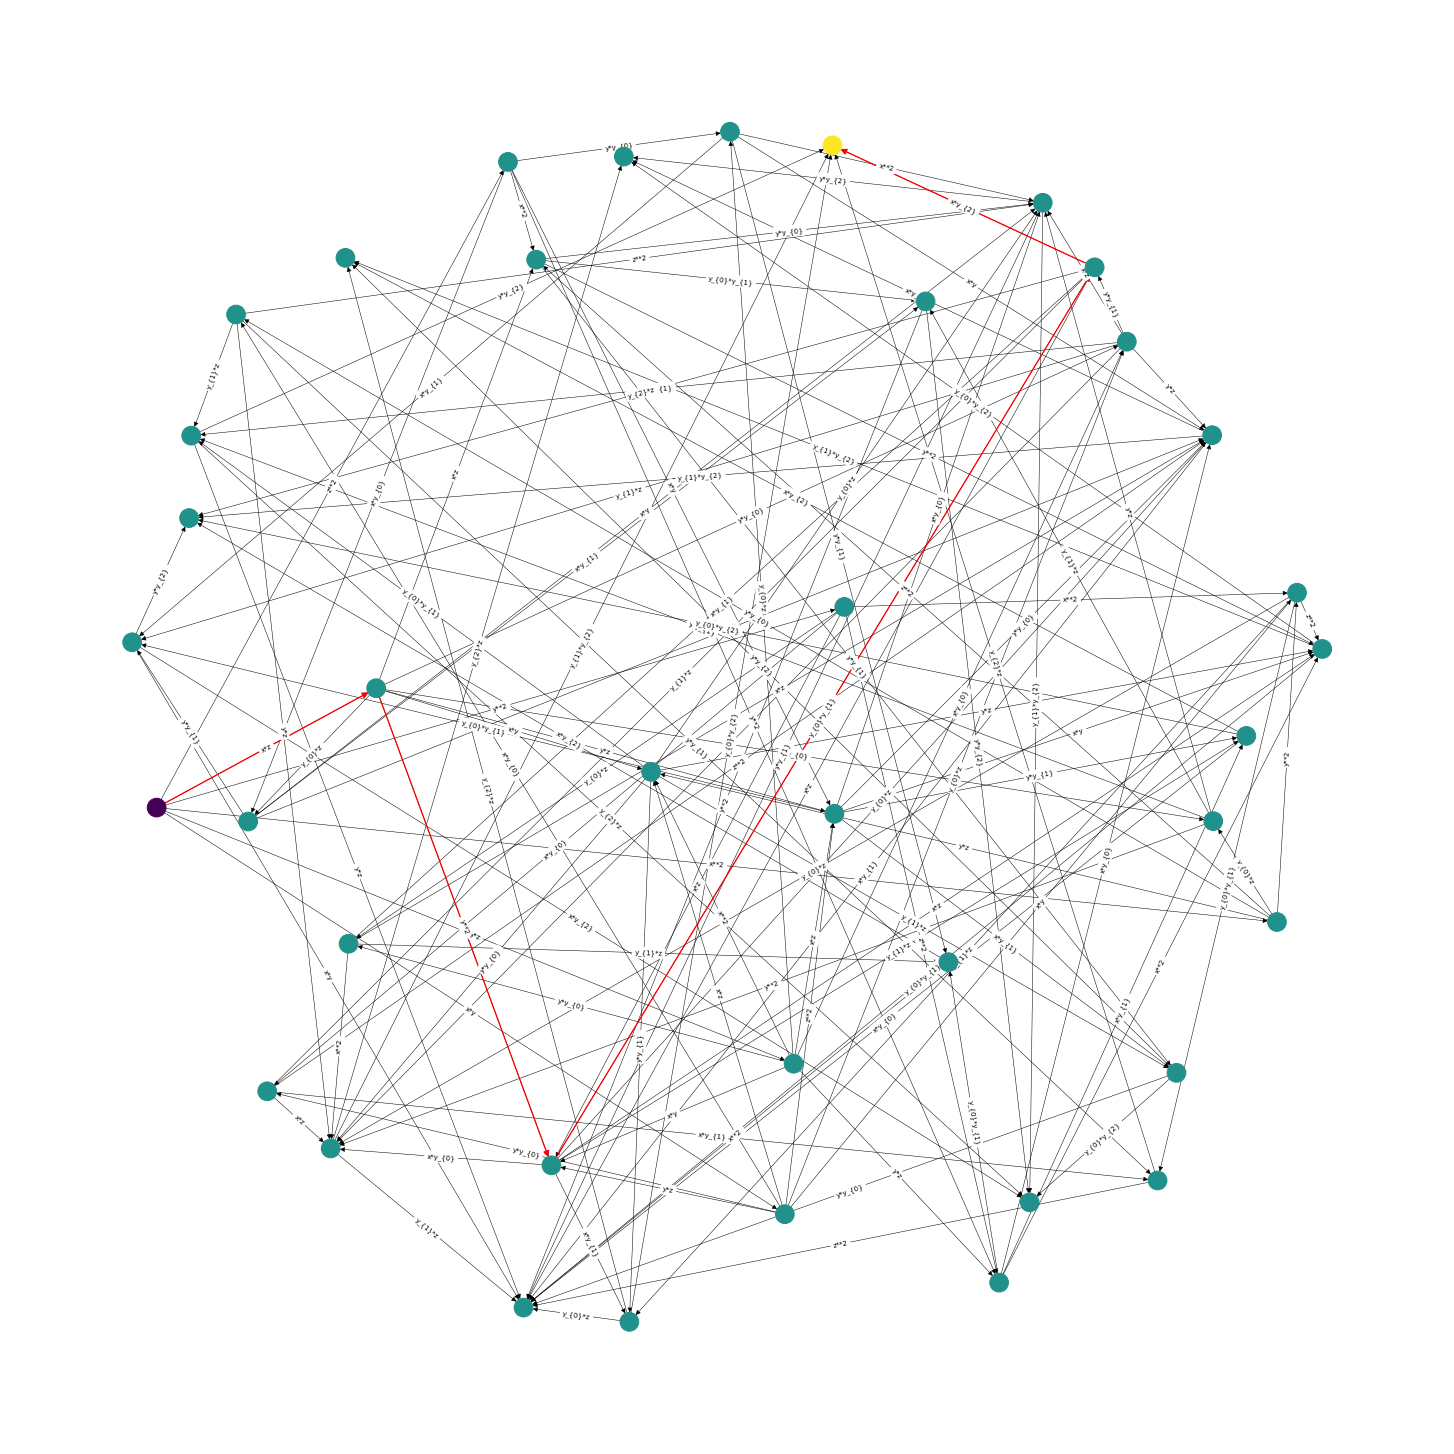

In [17]:
visualize('graph_log.csv', figsize=(20, 20), node_size=350, edge_width=0.5, edge_label_font_size=7)
